<a href="https://colab.research.google.com/github/KartohaWhy/my_colab/blob/main/Copy_Chocolate_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Никнейм на Kaggle - Kartoha

# Описание задачи

Даны характеристики шоколадок и по ним нужно предсказать их рейтинг.

# Импорт библиотек, загрузка данных

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
TRAIN = "https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/chocolate_train.csv"
TEST = "https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/chocolate_test_new.csv"

In [ ]:
train_df = pd.read_csv(TRAIN)

# Обзор данных

In [ ]:
train_df.head()

,Company,Specific Bean Origin,REF,Review,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,Willie's Cacao,Rio Caribe,457,2009,72%,U.K.,3.25,Trinitario,Venezuela
1,Beschle (Felchlin),"Ocumare, Premier Cru, Quizas No. 2",508,2010,72%,Switzerland,3.50,,Venezuela
2,Dark Forest,Tanzania,1554,2015,70%,U.S.A.,3.00,,Tanzania
3,Brasstown aka It's Chocolate,Cooproagro,1125,2013,72%,U.S.A.,3.00,Trinitario,Dominican Republic
4,Pralus,"Java, Indonesie",32,2006,75%,France,3.50,Criollo,Indonesia


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1255 non-null   object 
 1   Specific Bean Origin  1255 non-null   object 
 2   REF                   1255 non-null   int64  
 3   Review                1255 non-null   int64  
 4   Cocoa Percent         1255 non-null   object 
 5   Company Location      1255 non-null   object 
 6   Rating                1255 non-null   float64
 7   Bean Type             1254 non-null   object 
 8   Broad Bean Origin     1254 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 88.4+ KB


In [ ]:
train_df.describe(include='object')

,Company,Specific Bean Origin,Cocoa Percent,Company Location,Bean Type,Broad Bean Origin
count,1255,1255,1255,1255,1254,1254
unique,376,762,40,58,38,84
top,Soma,Madagascar,70%,U.S.A.,,Venezuela
freq,35,39,461,521,628,144


In [ ]:
!pip install association-metrics

ERROR: Operation cancelled by user


# Обработка пропусков

In [ ]:
train_df.dropna(axis=0,inplace=True)

array(['Trinitario', '\xa0', 'Criollo', 'Criollo, Trinitario',
       'Forastero (Arriba)', 'Amazon mix', 'Forastero (Arriba) ASS',
       'Forastero', 'Trinitario, Forastero', 'Forastero (Nacional)',
       'Criollo (Porcelana)', 'Criollo (Amarru)',
       'Forastero(Arriba, CCN)', 'Trinitario (Amelonado)', 'Blend',
       'Forastero (Parazinho)', 'Matina', 'Nacional (Arriba)',
       'Trinitario, TCGA', 'Criollo, Forastero', 'Criollo (Ocumare 77)',
       'Amazon, ICS', 'Nacional', 'Criollo (Ocumare)', 'Criollo, +',
       'Forastero (Catongo)', 'Amazon', 'Criollo (Wild)',
       'Trinitario, Criollo', 'EET', 'Trinitario (85% Criollo)',
       'Criollo (Ocumare 61)', 'Forastero, Trinitario',
       'Blend-Forastero,Criollo', 'Criollo (Ocumare 67)',
       'Forastero (Amelonado)', 'Trinitario, Nacional',
       'Forastero (Arriba) ASSS'], dtype=object)

In [ ]:
train_df[train_df['Bean Type']=='\xa0']

,Company,Specific Bean Origin,REF,Review,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
1,Beschle (Felchlin),"Ocumare, Premier Cru, Quizas No. 2",508,2010,72%,Switzerland,3.50,,Venezuela
2,Dark Forest,Tanzania,1554,2015,70%,U.S.A.,3.00,,Tanzania
6,Letterpress,Beniamo,1562,2015,70%,U.S.A.,3.25,,Bolivia
9,Duffy's,Star of Ecuador,523,2010,70%,U.K.,2.50,,Ecuador
11,Beschle (Felchlin),"Indigena Amazonia, Grand Cru, Quizas",636,2011,72%,Switzerland,3.50,,Venezuela
...,...,...,...,...,...,...,...,...,...
1243,Letterpress,Kokoa Kamili,1566,2015,70%,U.S.A.,3.50,,Tanzania
1244,Mast Brothers,"La Red de Guanconejo, N. Highlands coop",777,2011,74%,U.S.A.,3.75,,Dominican Republic
1249,twenty-four blackbirds,Palos Blancos,1026,2013,75%,U.S.A.,2.50,,Bolivia
1251,Marana,Cusco,1884,2016,70%,Peru,2.75,,Peru


In [ ]:
X_train_full = train_df.drop('Rating',axis=1)
y_train_full = train_df['Rating']

<Axes: >

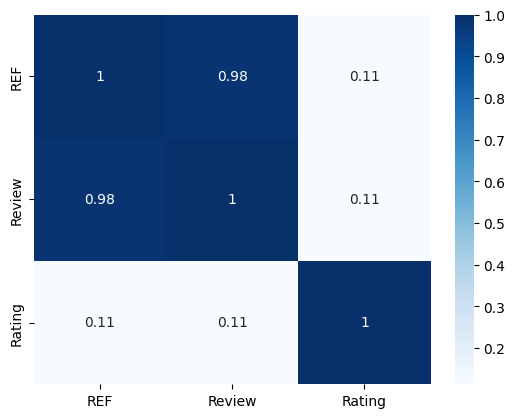

In [ ]:
import seaborn as sns

cols = train_df.columns[train_df.dtypes != 'object']

corr = train_df[cols].corr()

sns.heatmap(corr,cmap='Blues',annot=True)



Признак REF сильно коррелирует с Review. Это и логично, потому что чем свежее запись, тем больше год. Поэтому колонку REF можно убрать

In [ ]:
X_train_full = X_train_full.drop('REF',axis=1)

In [ ]:
import association_metrics as am

XC = X_train_full.apply(lambda x: x.astype('category') if x.dtype == 'object' else x)

cramersv = am.CramersV(XC)

cramersv.fit()

,Company,Specific Bean Origin,Cocoa Percent,Company Location,Bean Type,Broad Bean Origin
Company,1.000000,0.771180,0.631741,0.999651,0.616975,0.607303
Specific Bean Origin,0.771180,1.000000,0.773074,0.808513,0.907951,0.983334
Cocoa Percent,0.631741,0.773074,1.000000,0.243831,0.158698,0.266361
Company Location,0.999651,0.808513,0.243831,1.000000,0.291667,0.383039
Bean Type,0.616975,0.907951,0.158698,0.291667,1.000000,0.388294
Broad Bean Origin,0.607303,0.983334,0.266361,0.383039,0.388294,1.000000


Признак сильно коррелирует с Company Location, а Specific Bean Origin с Broad Bean Origin, поэтому эти колонки тоже убираем

In [ ]:
X_train_full = X_train_full.drop(['Company Location','Broad Bean Origin'],axis=1)

In [ ]:
X_train_full.head()

,Company,Specific Bean Origin,Review,Cocoa Percent
0,Willie's Cacao,Rio Caribe,2009,72%
1,Beschle (Felchlin),"Ocumare, Premier Cru, Quizas No. 2",2010,72%
2,Dark Forest,Tanzania,2015,70%
3,Brasstown aka It's Chocolate,Cooproagro,2013,72%
4,Pralus,"Java, Indonesie",2006,75%


# Разделение на трейн и тест и обучение

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=42)

In [ ]:
!pip install catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 11.1 MB/s eta 0:00:00


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002 entries, 199 to 1128
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               1002 non-null   object
 1   Specific Bean Origin  1002 non-null   object
 2   Review                1002 non-null   int64 
 3   Cocoa Percent         1002 non-null   object
 4   Bean Type             1002 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.0+ KB


# Проверяем catboost(из baseline ноутбука)

In [ ]:
cat_features = [0,1,3,4]

In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(cat_features=cat_features)

In [ ]:
model.fit(X_train,y_train)

Learning rate set to 0.040956
0:	learn: 0.4742269	total: 48.9ms	remaining: 48.8s
1:	learn: 0.4723512	total: 51.2ms	remaining: 25.5s
2:	learn: 0.4702870	total: 54.2ms	remaining: 18s
3:	learn: 0.4688579	total: 57.6ms	remaining: 14.3s
4:	learn: 0.4668058	total: 60ms	remaining: 11.9s
5:	learn: 0.4645934	total: 62.5ms	remaining: 10.3s
6:	learn: 0.4620721	total: 64.8ms	remaining: 9.2s
7:	learn: 0.4597765	total: 67.2ms	remaining: 8.33s
8:	learn: 0.4578287	total: 68.6ms	remaining: 7.55s
9:	learn: 0.4561512	total: 71.3ms	remaining: 7.06s
10:	learn: 0.4545721	total: 72.9ms	remaining: 6.55s
11:	learn: 0.4534560	total: 75.7ms	remaining: 6.23s
12:	learn: 0.4514649	total: 77.9ms	remaining: 5.91s
13:	learn: 0.4498328	total: 80ms	remaining: 5.64s
14:	learn: 0.4485095	total: 82.2ms	remaining: 5.4s
15:	learn: 0.4473847	total: 84.3ms	remaining: 5.18s
16:	learn: 0.4457102	total: 86.7ms	remaining: 5.01s
17:	learn: 0.4440436	total: 89ms	remaining: 4.85s
18:	learn: 0.4426205	total: 91.2ms	remaining: 4.71s
19

In [ ]:
pred = model.predict(X_val)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_val,pred)

0.06988742214006005

Результаты неудовлетворительные

# Используем Пайплайн

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
!pip install category_encoders -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression

In [ ]:
from category_encoders.target_encoder import TargetEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder

In [ ]:
X_train.columns

Index(['Company', 'Specific Bean Origin', 'Review', 'Cocoa Percent',
       'Bean Type'],
      dtype='object')

In [ ]:
cat_cols = X_train[['Company','Specific Bean Origin','Cocoa Percent','Bean Type']]

In [ ]:
p1 = Pipeline([
    ('encoder',TargetEncoder(cols=cat_cols)),
    ('scaler',StandardScaler()),
    ('model',LinearRegression())
])

In [ ]:
X_train.head()

,Company,Specific Bean Origin,Review,Cocoa Percent,Bean Type
199,Arete,Chuno,2015,70%,"Criollo, Trinitario"
534,Potomac,"Oko Caribe, Duarte Province, 2016 H.",2016,70%,
1155,Ethel's Artisan (Mars),Trinidad,2011,55%,Trinitario
376,Habitual,Campesino w/ nibs,2014,74%,
1224,Caoni (Tulicorp),Los Rios,2008,55%,Forastero (Arriba)


In [ ]:
p1.fit(X_train,y_train)

Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                     Company                  Specific Bean Origin  \
199                    Arete                                 Chuno   
534                  Potomac  Oko Caribe, Duarte Province, 2016 H.   
1155  Ethel's Artisan (Mars)                              Trinidad   
376                 Habitual                     Campesino w/ nibs   
1224        Caoni (Tulicorp)                              Los Rios   
...                      ...                                   ...   
1045             Rozsavolgyi                    Aragua, Trincheras   
1097          Feitoria Cacao                         Maya Mountain   
1132                Guittard                              Trinidad   
861                   Pralus                              Jamaique   
1128                   Cello                             Venezuela   

     Cocoa Percent            Bean Type  
199            70%  Criollo, Trinitario  
534            70%                       
1155           55%           Trinitario  
376            74%                       
1224           55%   Forastero (Arriba)  
...            ...                  ...  
1045           70%                       
1097           76%           Trinitario  
1132           65%           Trinitario  
861            75%           Trinitario  
1128           70%                       

[1002 rows x 4 columns])),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [ ]:
pred_p1 = p1.predict(X_val)

r2_score(y_val,pred_p1)

0.0034688055717219113

In [ ]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [ ]:
p2 = Pipeline([
    ('encoder',TargetEncoder(cols=cat_cols)),
    ('scaler',StandardScaler()),
    ('model',RandomForestRegressor(n_jobs=-1))
])

p2.fit(X_train,y_train)

pred_p2 = p2.predict(X_val)

r2_score(y_val,pred_p2)

-0.0334960363180965

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

Было протестировано примерно 40 различных вариантов и, к сожалению, кроме OneHotEncoder результаты выше 0.05 не были достигнуты. OneHotEncoder показал результаты в 3 раза лучше, хоть и время на обучение увеличилось

In [ ]:
p3 = Pipeline([
    ('encoder',OneHotEncoder(cols=cat_cols)),
    ('scaler',StandardScaler()),
    ('model',GradientBoostingRegressor(random_state=42))
])

p4 = Pipeline([
    ('encoder',OneHotEncoder(cols=cat_cols)),
    ('scaler',StandardScaler()),
    ('model',RandomForestRegressor(n_jobs=-1,random_state=42))
])

p5 = Pipeline([
    ('encoder',OneHotEncoder(cols=cat_cols)),
    ('scaler',MinMaxScaler()),
    ('model',GradientBoostingRegressor(random_state=42))
])

p6 = Pipeline([
    ('encoder',OneHotEncoder(cols=cat_cols)),
    ('scaler',MinMaxScaler()),
    ('model',RandomForestRegressor(random_state=42))
])

In [ ]:
for i,p in enumerate([p3,p4,p5,p6]):
    p.fit(X_train,y_train)
    pred = p.predict(X_val)
    print(i+3, r2_score(y_val,pred))

3 0.16942446050633797
4 0.15747205635566686
5 0.16968253272174838
6 0.1572295959089961


Лучший пайплайн

In [ ]:
p8 = Pipeline([
    ('encoder',OneHotEncoder(cols=cat_cols)),
    ('scaler',MinMaxScaler()),
    ('model',GradientBoostingRegressor(random_state=42))
])
p8.fit(X_train,y_train)
pred = p8.predict(X_val)
print(r2_score(y_val,pred))



0.16968253272174838


In [ ]:
import matplotlib.pyplot as plt

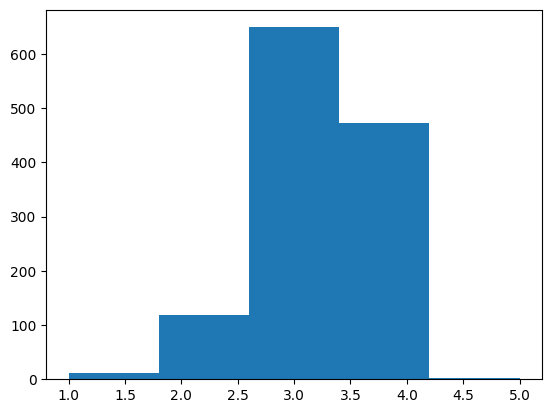

In [ ]:
plt.hist(y_train_full,bins=5);

# Используем Optuna

Самая лучшая модель получилась GradientBoostingRegressor, но стоит проверить и другие модели с подбором гиперпаметров, так как разница между ними была небольшой

In [ ]:
!pip install optuna -q

In [ ]:
my_pipeline = Pipeline([
    ('encoder',OneHotEncoder(cols=cat_cols)),
    ('scaler',MinMaxScaler())
])

X_train_good = my_pipeline.fit_transform(X_train,y_train)
X_val_good = my_pipeline.transform(X_val)

## Случайный лес

Самые лучшие результаты показывает параметр min_samples_leaf=1, но время на обучение с этим параметром сильно больше. Тестировать 300 вариантов с таким параметром очень долго, поэтому в этот параметр был добавлен диапазон от 1 до 100

In [ ]:
import optuna

def objective(trial):

    param = {
        'n_estimators':trial.suggest_int('n_estimators',10,1000),
        'max_features':trial.suggest_categorical('max_features',['sqrt','log2']),
        'max_depth':trial.suggest_int('max_depth',10,500),
        'criterion':trial.suggest_categorical('criterion',['squared_error','absolute_error','friedman_mse','poisson']),
        'min_samples_leaf':trial.suggest_int('min_samples_leaf',1,100)
    }

    estimator = RandomForestRegressor(**param,verbose=False,n_jobs=-1,random_state=42)
    estimator.fit(X_train_good,y_train)
    pred = estimator.predict(X_val_good)

    return r2_score(y_val,pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=300)
print(study.best_trial)

[I 2024-07-19 12:53:34,132] A new study created in memory with name: no-name-f3e5a049-800a-4593-86bb-abcc75f5382c
[I 2024-07-19 12:53:34,564] Trial 0 finished with value: -0.0012165908258736646 and parameters: {'n_estimators': 55, 'max_features': 'sqrt', 'max_depth': 298, 'criterion': 'squared_error', 'min_samples_leaf': 61}. Best is trial 0 with value: -0.0012165908258736646.
[I 2024-07-19 12:53:37,165] Trial 1 finished with value: -0.001803282328489919 and parameters: {'n_estimators': 856, 'max_features': 'log2', 'max_depth': 275, 'criterion': 'squared_error', 'min_samples_leaf': 79}. Best is trial 0 with value: -0.0012165908258736646.
[I 2024-07-19 12:53:40,068] Trial 2 finished with value: 0.0001299852810350277 and parameters: {'n_estimators': 778, 'max_features': 'sqrt', 'max_depth': 167, 'criterion': 'poisson', 'min_samples_leaf': 95}. Best is trial 2 with value: 0.0001299852810350277.
[I 2024-07-19 12:53:42,908] Trial 3 finished with value: -0.002448090861180363 and parameters: 

KeyboardInterrupt: 

Лучшая модель случайного леса

In [ ]:
model_check = RandomForestRegressor(n_estimators=465, max_features='sqrt', max_depth=287,min_samples_leaf=1,criterion='absolute_error',random_state=42)
model_check.fit(X_train_good,y_train)

pred_check = model_check.predict(X_val_good)

r2_score(y_val,pred_check)

0.18706039394547325

## Градиентный бустинг

Подбор гиперпараметров градиентного бустинга

In [ ]:
def objective_grad(trial):

    param = {
        'n_estimators':trial.suggest_int('n_estimators',70,300),
        'loss':trial.suggest_categorical('loss',['squared_error','absolute_error','huber','quantile']),
        'max_features':trial.suggest_categorical('max_features',['sqrt','log2',None]),
        'criterion':trial.suggest_categorical('criterion',['squared_error','friedman_mse']),
    }

    estimator = GradientBoostingRegressor(**param,verbose=False,random_state=42)
    estimator.fit(X_train_good,y_train)
    pred = estimator.predict(X_val_good)

    return r2_score(y_val,pred)

study_grad = optuna.create_study(direction='maximize')
study_grad.optimize(objective_grad,n_trials=100)

[I 2024-07-19 13:29:17,698] A new study created in memory with name: no-name-87f93434-7fbb-4e8a-9329-2c78cb2918a2
[I 2024-07-19 13:29:18,612] Trial 0 finished with value: 0.10226091834892159 and parameters: {'n_estimators': 176, 'loss': 'huber', 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 0 with value: 0.10226091834892159.
[I 2024-07-19 13:29:19,669] Trial 1 finished with value: 0.10512133352315711 and parameters: {'n_estimators': 235, 'loss': 'huber', 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 1 with value: 0.10512133352315711.
[I 2024-07-19 13:29:20,718] Trial 2 finished with value: -1.3287733249183251 and parameters: {'n_estimators': 257, 'loss': 'quantile', 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 1 with value: 0.10512133352315711.
[I 2024-07-19 13:29:21,252] Trial 3 finished with value: 0.11443801112521357 and parameters: {'n_estimators': 191, 'loss': 'absolute_error', 'max_features': 'sqrt', 'criterion

FrozenTrial(number=191, state=TrialState.COMPLETE, values=[0.18706039394547325], datetime_start=datetime.datetime(2024, 7, 19, 13, 7, 23, 791568), datetime_complete=datetime.datetime(2024, 7, 19, 13, 9, 22, 46007), params={'n_estimators': 465, 'max_features': 'sqrt', 'max_depth': 287, 'criterion': 'absolute_error', 'min_samples_leaf': 1}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1000, log=False, low=10, step=1), 'max_features': CategoricalDistribution(choices=('sqrt', 'log2')), 'max_depth': IntDistribution(high=500, log=False, low=10, step=1), 'criterion': CategoricalDistribution(choices=('squared_error', 'absolute_error', 'friedman_mse', 'poisson')), 'min_samples_leaf': IntDistribution(high=100, log=False, low=1, step=1)}, trial_id=191, value=None)


In [ ]:
print(study_grad.best_trial)

FrozenTrial(number=94, state=TrialState.COMPLETE, values=[0.20606228472254662], datetime_start=datetime.datetime(2024, 7, 19, 13, 34, 4, 777291), datetime_complete=datetime.datetime(2024, 7, 19, 13, 34, 8, 347424), params={'n_estimators': 284, 'loss': 'squared_error', 'max_features': None, 'criterion': 'friedman_mse'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=300, log=False, low=70, step=1), 'loss': CategoricalDistribution(choices=('squared_error', 'absolute_error', 'huber', 'quantile')), 'max_features': CategoricalDistribution(choices=('sqrt', 'log2', None)), 'criterion': CategoricalDistribution(choices=('squared_error', 'friedman_mse'))}, trial_id=94, value=None)


Лучшая модель градиентного бустинга

In [ ]:
model_check_grad = GradientBoostingRegressor(n_estimators=284, loss='squared_error', max_features=None,criterion='friedman_mse',random_state=42)
model_check_grad.fit(X_train_good,y_train)

pred_check_grad = model_check_grad.predict(X_val_good)

r2_score(y_val,pred_check_grad)

0.20606228472254662

**Результат r^2 > 0.2 достигнут**

In [ ]:
X_train_good

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## СatBoost

Проверяем базовый catboost

In [ ]:
model_cat = CatBoostRegressor(cat_features=cat_features,random_seed=42)
model_cat.fit(X_train,y_train)
pred_cat = model_cat.predict(X_val)

r2_score(y_val,pred_cat)

Learning rate set to 0.040956
0:	learn: 0.4733522	total: 3.57ms	remaining: 3.56s
1:	learn: 0.4704527	total: 6.6ms	remaining: 3.29s
2:	learn: 0.4683440	total: 8.95ms	remaining: 2.98s
3:	learn: 0.4667880	total: 10.8ms	remaining: 2.69s
4:	learn: 0.4642724	total: 12.9ms	remaining: 2.57s
5:	learn: 0.4621443	total: 14.9ms	remaining: 2.48s
6:	learn: 0.4609768	total: 16.9ms	remaining: 2.4s
7:	learn: 0.4592978	total: 19.7ms	remaining: 2.45s
8:	learn: 0.4572959	total: 22.2ms	remaining: 2.44s
9:	learn: 0.4560588	total: 24.1ms	remaining: 2.38s
10:	learn: 0.4546199	total: 26.3ms	remaining: 2.36s
11:	learn: 0.4530495	total: 28.4ms	remaining: 2.34s
12:	learn: 0.4516526	total: 30.5ms	remaining: 2.31s
13:	learn: 0.4498974	total: 32.7ms	remaining: 2.3s
14:	learn: 0.4482511	total: 35.1ms	remaining: 2.3s
15:	learn: 0.4466395	total: 37.7ms	remaining: 2.31s
16:	learn: 0.4450960	total: 40.2ms	remaining: 2.32s
17:	learn: 0.4440485	total: 42ms	remaining: 2.29s
18:	learn: 0.4424028	total: 44.4ms	remaining: 2.29

0.04656179838961516

CatBoostRegressor с гиперпараметрами

In [ ]:
def objective(trial):

    param = {
        'loss_function':trial.suggest_categorical('loss_function',['RMSE','MAE','MAPE','Poisson']),
        'eta':trial.suggest_float('eta',0,1),
        'iterations':trial.suggest_int('iterations',700,2000),
        }

    estimator = CatBoostRegressor(**param,verbose=False,random_state=42)
    estimator.fit(X_train_good,y_train)
    pred = estimator.predict(X_val_good)

    return r2_score(y_val,pred)

study_cat = optuna.create_study(direction='maximize')
study_cat.optimize(objective,n_trials=100)
print(study_cat.best_trial)

[I 2024-07-19 13:14:53,290] A new study created in memory with name: no-name-86ce097c-4660-4164-8255-f5bb13ca4d7a
[I 2024-07-19 13:15:02,399] Trial 0 finished with value: -0.14067138564298576 and parameters: {'loss_function': 'Poisson', 'eta': 0.9099886159651793, 'iterations': 1825}. Best is trial 0 with value: -0.14067138564298576.
[I 2024-07-19 13:15:07,332] Trial 1 finished with value: 0.060886662788282475 and parameters: {'loss_function': 'MAPE', 'eta': 0.46963754271578506, 'iterations': 1286}. Best is trial 1 with value: 0.060886662788282475.
[I 2024-07-19 13:15:16,248] Trial 2 finished with value: 0.05703952114409272 and parameters: {'loss_function': 'MAPE', 'eta': 0.30000971817561595, 'iterations': 1900}. Best is trial 1 with value: 0.060886662788282475.
[I 2024-07-19 13:15:20,074] Trial 3 finished with value: 0.11802735905380535 and parameters: {'loss_function': 'MAPE', 'eta': 0.6988253795079409, 'iterations': 979}. Best is trial 3 with value: 0.11802735905380535.
[I 2024-07-19

FrozenTrial(number=53, state=TrialState.COMPLETE, values=[0.17786116725826773], datetime_start=datetime.datetime(2024, 7, 19, 13, 20, 18, 99176), datetime_complete=datetime.datetime(2024, 7, 19, 13, 20, 22, 656536), params={'loss_function': 'RMSE', 'eta': 0.05647451129998518, 'iterations': 1199}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'loss_function': CategoricalDistribution(choices=('RMSE', 'MAE', 'MAPE', 'Poisson')), 'eta': FloatDistribution(high=1.0, log=False, low=0.0, step=None), 'iterations': IntDistribution(high=2000, log=False, low=700, step=1)}, trial_id=53, value=None)


Лучшая модель CatBoostRegressor

In [ ]:
model_check_cat = CatBoostRegressor(loss_function='RMSE', eta=0.05647451129998518, iterations=1199,random_state=42)
model_check_cat.fit(X_train_good,y_train)

pred_check = model_check_cat.predict(X_val_good)

r2_score(y_val,pred_check)

0:	learn: 0.4743457	total: 23.9ms	remaining: 28.6s
1:	learn: 0.4725252	total: 39ms	remaining: 23.3s
2:	learn: 0.4711483	total: 54.2ms	remaining: 21.6s
3:	learn: 0.4694441	total: 62ms	remaining: 18.5s
4:	learn: 0.4673705	total: 75.6ms	remaining: 18s
5:	learn: 0.4654596	total: 83ms	remaining: 16.5s
6:	learn: 0.4638198	total: 94.2ms	remaining: 16s
7:	learn: 0.4630018	total: 101ms	remaining: 15s
8:	learn: 0.4615224	total: 110ms	remaining: 14.5s
9:	learn: 0.4607192	total: 118ms	remaining: 14s
10:	learn: 0.4602309	total: 127ms	remaining: 13.7s
11:	learn: 0.4589324	total: 134ms	remaining: 13.3s
12:	learn: 0.4582988	total: 143ms	remaining: 13.1s
13:	learn: 0.4572093	total: 151ms	remaining: 12.8s
14:	learn: 0.4557204	total: 160ms	remaining: 12.6s
15:	learn: 0.4545358	total: 168ms	remaining: 12.4s
16:	learn: 0.4543432	total: 182ms	remaining: 12.7s
17:	learn: 0.4539858	total: 193ms	remaining: 12.7s
18:	learn: 0.4535188	total: 199ms	remaining: 12.4s
19:	learn: 0.4533176	total: 212ms	remaining: 12.

0.17786116725826773

In [ ]:
study.best_params

{'n_estimators': 798,
 'max_features': 'log2',
 'max_depth': 444,
 'criterion': 'friedman_mse',
 'min_samples_leaf': 1}

# Вывод

Результат 0.2 был достигнут только с помощью градиентного бустинга с подобранными гиперпараметрами

# Сохранение предсказаний

In [ ]:
test_data = pd.read_csv(TEST)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               540 non-null    object
 1   Specific Bean Origin  540 non-null    object
 2   REF                   540 non-null    int64 
 3   Review                540 non-null    int64 
 4   Cocoa Percent         540 non-null    object
 5   Company Location      540 non-null    object
 6   Bean Type             540 non-null    object
 7   Broad Bean Origin     540 non-null    object
dtypes: int64(2), object(6)
memory usage: 33.9+ KB


In [ ]:
X_train_full.columns

Index(['Company', 'Specific Bean Origin', 'Review', 'Cocoa Percent',
       'Bean Type'],
      dtype='object')

In [ ]:
test_data = test_data.drop(['REF','Company Location','Broad Bean Origin'],axis=1)

In [ ]:
test_good = my_pipeline.transform(test_data)
test_pred = model_check_grad.predict(test_good)

In [ ]:
test_data['prediction'] = test_pred
test_data[['prediction']].to_csv('test_prediction.csv',index=False)

In [ ]:
import pickle

with open('model_check_grad.pickle','wb') as f:
    pickle.dump(model_check_grad,f)

# Неудачные варианты

In [ ]:
!pip install lightgbm -q

In [ ]:
from xgboost import XGBRegressor

In [ ]:
def objective(trial):

    param = {
        'booster':trial.suggest_categorical('booster',['gbtree','dart']),
        'eta':trial.suggest_float('eta',0,1),
        'max_depth':trial.suggest_int('max_depth',1,500),
        }

    estimator = XGBRegressor(**param,random_state=42)
    estimator.fit(X_train_good,y_train)
    pred = estimator.predict(X_val_good)

    return r2_score(y_val,pred)

study_cat = optuna.create_study(direction='maximize')
study_cat.optimize(objective,n_trials=500)
print(study_cat.best_trial)

In [ ]:
def objective(trial):

    param = {
        'booster':trial.suggest_categorical('booster',['gbtree','dart']),
        'eta':trial.suggest_float('eta',0,1),
        'min_split_loss':trial.suggest_int('min_split_loss',0,200),
        'max_depth':trial.suggest_int('max_depth',1,500),
        'max_leaves':trial.suggest_int('max_leaves',0,200),
        'reg_lambda':trial.suggest_float('reg_lambda',0,1),
        }

    estimator = XGBRegressor(**param,random_state=42)
    estimator.fit(X_train_good,y_train)
    pred = estimator.predict(X_val_good)

    return r2_score(y_val,pred)

study_cat = optuna.create_study(direction='maximize')
study_cat.optimize(objective,n_trials=500)
print(study_cat.best_trial)

In [ ]:
model_check = XGBRegressor(booster='gbtree', eta=0.3964814736078854, min_split_loss=29,max_depth=185,max_leaves=62,random_state=42)
model_check.fit(X_train_good,y_train)

pred_check = model_check.predict(X_val_good)

r2_score(y_val,pred_check)

-0.0025897142120105965

In [ ]:
model_check = XGBRegressor(booster='dart', eta=0.49839524236206295, min_split_loss=17,max_depth=26,max_leaves=60,random_state=42)
model_check.fit(X_train_good,y_train)

pred_check = model_check.predict(X_val_good)

r2_score(y_val,pred_check)

In [ ]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('rfr',RandomForestRegressor(n_estimators=465, max_features='sqrt', max_depth=287,min_samples_leaf=1,criterion='absolute_error',random_state=42)),
    ('gbr',GradientBoostingRegressor(n_estimators=284, loss='squared_error', max_features=None,criterion='friedman_mse',random_state=42))
]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=GradientBoostingRegressor(n_estimators=284, loss='squared_error', max_features=None,criterion='friedman_mse',random_state=42)
)

In [ ]:
reg.fit(X_train_good,y_train)
pred_stacking = reg.predict(X_val_good)

r2_score(y_val,pred_stacking)

0.03259310243336666